## Data Mining Assignment 1: Sarah Darlyna bt Mohd Radzi (0134768)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_excel("/Users/sarahdarlyna/Downloads/JapanMenuItems.xlsx")

In [33]:
df.head()

,California Roll,Salmon Nigiri,Tonkotsu Ramen,Chicken Teriyaki Bento,Edamame,Gyoza (Dumplings),Tempura (Shrimp),Green Tea Ice Cream,Mochi Ice Cream,Matcha Latte
0,1,0,1,0,1,0,1,0,0,0
1,0,0,1,0,0,0,1,0,1,0
2,0,1,0,1,0,1,0,0,1,0
3,1,1,0,1,1,1,0,0,1,0
4,1,1,1,1,1,1,0,1,1,0


In [4]:
y = np.array(df)

In [34]:
print(y[:5])

[[1 0 1 0 1 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 1 0]
 [0 1 0 1 0 1 0 0 1 0]
 [1 1 0 1 1 1 0 0 1 0]
 [1 1 1 1 1 1 0 1 1 0]]


In [35]:
# Missing Value
df.isnull().sum()

California Roll           0
Salmon Nigiri             0
Tonkotsu Ramen            0
Chicken Teriyaki Bento    0
Edamame                   0
Gyoza (Dumplings)         0
Tempura (Shrimp)          0
Green Tea Ice Cream       0
Mochi Ice Cream           0
Matcha Latte              0
dtype: int64

There are no missing value

In [6]:
ft = ["California Roll", "Salmon Nigiri", "Tonkotsu Ramen", "Chicken Teriyaki Bento", "Edamame","Gyoza","Tempura(Shrimp)","Green Tea Ice Cream", "Mochi Ice Cream", "Matcha Latte"]

In [7]:
num_cr = 0
for sample in y:
    if sample[0] == 1:
        num_cr += 1
        
print("{0} people order california roll".format(num_cr))

94 people order california roll


94 people ordered California Roll
87 people ordered Salmon Nigiri
105 people ordered Tonkotsu Ramen
96 people ordered Chicken Teriyaki Bento
101 people ordered Edamame
86 people ordered Gyoza
95 people ordered Tempura(Shrimp)
107 people ordered Green Tea Ice Cream
114 people ordered Mochi Ice Cream
105 people ordered Matcha Latte


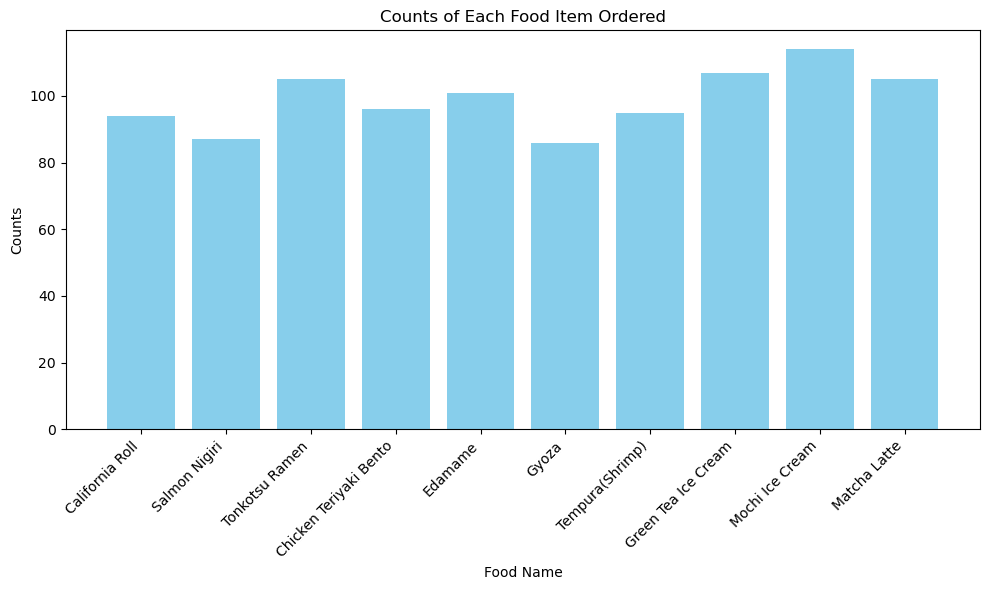

In [8]:
item_counts = {food_item: 0 for food_item in ft}

for sample in y:
    for index, value in enumerate(sample):
        if value == 1:
            item_counts[ft[index]] += 1

for food_item, count in item_counts.items():
    print(f"{count} people ordered {food_item}")

plt.figure(figsize=(10, 6))
plt.bar(item_counts.keys(), item_counts.values(), color='skyblue')
plt.xlabel('Food Name')
plt.ylabel('Counts')
plt.title('Counts of Each Food Item Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart above displays the total number of each Japanese food ordered from the dataset.

In [9]:
#how many of those cases that a person order california roll
rule_valid = 0
rule_invalid = 0

for sample in y: 
    if sample[0] == 1:
        if sample[2] == 1: #order california and ramen
            rule_valid += 1
        else:
            rule_invalid += 1

print("{0} cases of the rule being valid discovered".format(rule_valid))
print("{0} cases of the rule being invalid discovered".format(rule_invalid))

41 cases of the rule being valid discovered
53 cases of the rule being invalid discovered


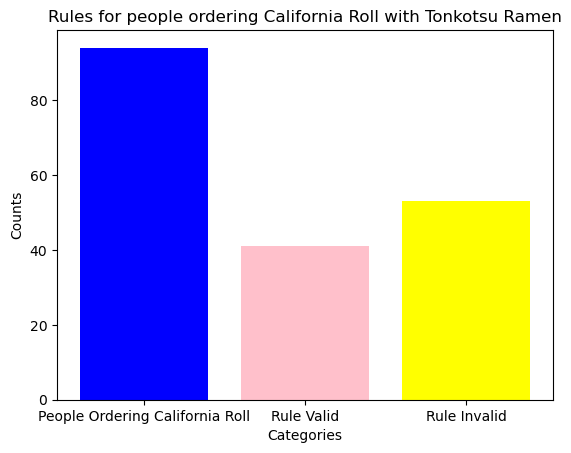

In [22]:
labels = ['People Ordering California Roll', 'Rule Valid', 'Rule Invalid']
values = [num_cr, rule_valid, rule_invalid]

plt.bar(labels, values, color=['blue', 'pink', 'yellow'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Rules for people ordering California Roll with Tonkotsu Ramen')
plt.show()

The bar chart above illustrates the total number of customer ordering california roll from the dataset and how many customer ordered california roll and tonkotsu ramen (rule valid) and how many did not have this combination in their order (rule invalid).

In [11]:
support = rule_valid
confidence = rule_valid/num_cr

print("support is {0} and the confidence is {1:.3f}.".format(support, confidence))
print("percentage is {0:.1f}%.".format(100*confidence))

support is 41 and the confidence is 0.436.
percentage is 43.6%.


In [12]:
n_samples, n_features = y.shape
print("This dataset has {0} samples and {1} features".format(n_samples, n_features))

This dataset has 199 samples and 10 features


In [13]:
from collections import defaultdict

valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)

for sample in y:
    for premise in range(n_features):
        if sample[premise] == 0: continue
        num_occurences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion:  # It makes little sense to measure if X -> X.
                continue
            if sample[conclusion] == 1:
                # This person also bought the conclusion item
                valid_rules[(premise, conclusion)] += 1
            else:
                # This person bought the premise, but not the conclusion
                invalid_rules[(premise, conclusion)] += 1
support = valid_rules
confidence = defaultdict(float)
lift = defaultdict(float)

for premise, conclusion in valid_rules.keys():
    confidence[(premise, conclusion)] = valid_rules[(premise, conclusion)] / num_occurences[premise]
    lift[(premise, conclusion)] = confidence[(premise, conclusion)] / (num_occurences[conclusion] / len(df))
    

In [14]:
for premise, conclusion in confidence:
    premise_name = ft[premise]
    conclusion_name = ft[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Lift: {0:.3f}".format(lift[(premise, conclusion)]))
    print("")

Rule: If a person buys California Roll they will also buy Tonkotsu Ramen
 - Support: 41
 - Confidence: 0.436
 - Lift: 0.827

Rule: If a person buys California Roll they will also buy Edamame
 - Support: 50
 - Confidence: 0.532
 - Lift: 1.048

Rule: If a person buys California Roll they will also buy Tempura(Shrimp)
 - Support: 48
 - Confidence: 0.511
 - Lift: 1.070

Rule: If a person buys Tonkotsu Ramen they will also buy California Roll
 - Support: 41
 - Confidence: 0.390
 - Lift: 0.827

Rule: If a person buys Tonkotsu Ramen they will also buy Edamame
 - Support: 47
 - Confidence: 0.448
 - Lift: 0.882

Rule: If a person buys Tonkotsu Ramen they will also buy Tempura(Shrimp)
 - Support: 53
 - Confidence: 0.505
 - Lift: 1.057

Rule: If a person buys Edamame they will also buy California Roll
 - Support: 50
 - Confidence: 0.495
 - Lift: 1.048

Rule: If a person buys Edamame they will also buy Tonkotsu Ramen
 - Support: 47
 - Confidence: 0.465
 - Lift: 0.882

Rule: If a person buys Edamam

In [15]:
def print_rule(premise, conclusion, support, confidence, feat):
    premise_name = feat[premise]
    conclusion_name = feat[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print(" - Lift: {0:.3f}".format(lift[(premise, conclusion)]))
    print("")

In [16]:
print_rule(0,2,support,confidence,ft)

Rule: If a person buys California Roll they will also buy Tonkotsu Ramen
 - Confidence: 0.436
 - Support: 41
 - Lift: 0.827



In [25]:
similarity_scores = lift

def recommend_similar_items(item_id, sim_scores, num_recommendations = 3):
    related_scores = {key[1]: value for key, value in sim_scores.items() if key[0] == item_id}
    sorted_related_scores = sorted(related_scores.items(), key=lambda x: x[1], reverse=True)
    print(sorted_related_scores)
    recommended_items = sorted_related_scores[:num_recommendations]
    return recommended_items


In [30]:
item = input()

try:
    number = int(item)
    print("The integer value is:", number)
except ValueError:
    print("Invalid input. Please enter a valid integer.")

recommended_items = recommend_similar_items(number, similarity_scores)

print(f"Recommended items similar to item {number}:")
for item_id, similarity_score in recommended_items:
    print(f"Item {item_id}, Similarity Score: {similarity_score}")


4
The integer value is: 4
[(9, 1.0883545497406883), (0, 1.0480303349483884), (7, 1.031183492180994), (8, 1.0024318221295812), (1, 0.9964720609992034), (6, 0.9332985930171964), (3, 0.9235767326732673), (5, 0.9164172231176607), (2, 0.881942479962282)]
Recommended items similar to item 4:
Item 9, Similarity Score: 1.0883545497406883
Item 0, Similarity Score: 1.0480303349483884
Item 7, Similarity Score: 1.031183492180994
